<a href="https://colab.research.google.com/github/bithu-learn/NN-CNN/blob/main/nn_intro_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Instead of:
# from keras.utils.np_utils import to_categorical

# Use:
from tensorflow.keras.utils import to_categorical

## Load the data

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
#first element in tarining set
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

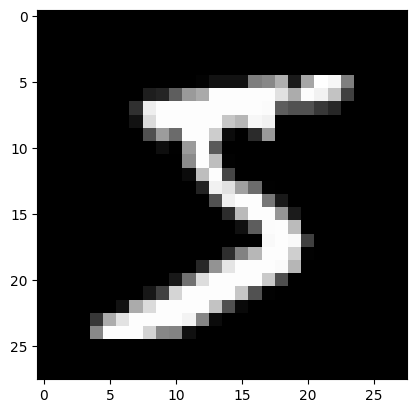

In [5]:
plt.imshow(X_train[0], cmap='grey')

In [6]:
#validating with testing data
y_train[0]

5

## Preprocessing the image data

In [7]:
img_ht, img_width = 28,28

In [8]:
X_train = X_train.reshape(60000, img_ht*img_width)

In [9]:
X_test = X_test.reshape(10000, img_ht*img_width)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [11]:
#checking and converting teh datatype in X_train and X_test
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [12]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
print(y_train.shape)
print(y_test.shape)
#we observe that y train test data is one dimensional , we must change that because our model will be predicting one among 10 classes
#each for each digit

(60000,)
(10000,)


In [14]:
y_train = to_categorical(y_train,10)
print(y_train.shape)
y_test = to_categorical(y_test,10)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [15]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
784 * 512 + 512

401920

In [20]:
512 * 512 + 512

262656

In [21]:
512 * 10 + 10

5130

## Compile the model

In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [22]:
history=model.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9099 - loss: 0.3020 - val_accuracy: 0.9694 - val_loss: 0.0993
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9732 - loss: 0.0836 - val_accuracy: 0.9771 - val_loss: 0.0718
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9836 - loss: 0.0518 - val_accuracy: 0.9811 - val_loss: 0.0640
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9874 - loss: 0.0375 - val_accuracy: 0.9765 - val_loss: 0.0869
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9903 - loss: 0.0307 - val_accuracy: 0.9831 - val_loss: 0.0672
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9732 - val_loss: 0.1105
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9764 - val_loss: 0.1029
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9941 - l

## What is the accuracy of the model?

### Plot the accuracy of the training model

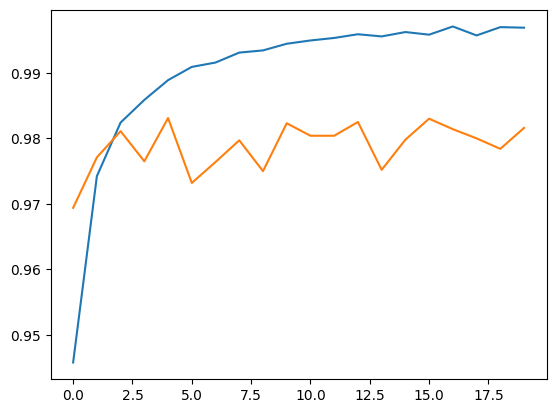

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Plot the accuracy of training and validation set

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Accuracy of training and validation with loss

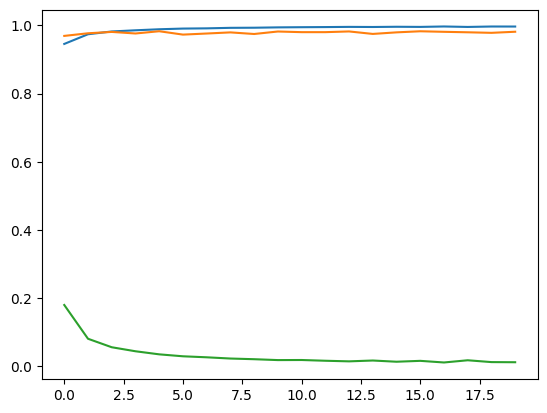

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

In [29]:
score = model.evaluate(X_test,y_test,verbose=0)
print(score)

[0.16602949798107147, 0.9815999865531921]


## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Pre-processing

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Use the model

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Recall that when using neural networks we got good accuracy.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()